In [76]:
import panel as pn
pn.extension('plotly')
from panel.interact import interact
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv


In [77]:
#load api keys
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)


In [78]:
#read csv files
usd_exchange = pd.read_csv(Path("Data/yearly.csv"))
current_exchange = pd.read_csv(Path("Data/Current_currency.csv"))
current_exchange

,Currency,USD,Inv USD,Lat,Lon
0,Argentine Peso,105.646642,0.009466,-38.416097,-63.616672
1,Australian Dollar,1.403362,0.712575,-25.274398,133.775136
2,Bahraini Dinar,0.376000,2.659574,25.930414,50.637772
3,Botswana Pula,11.594581,0.086247,-22.328474,24.684866
4,Brazilian Real,5.264651,0.189946,-14.235004,-51.925280
5,British Pound,0.738865,1.353426,55.378051,-3.435973
6,Bruneian Dollar,1.344099,0.743993,4.535277,114.727669
7,Bulgarian Lev,1.709288,0.585039,42.733883,25.485830
8,Canadian Dollar,1.266922,0.789314,56.130366,-106.346771
9,Chilean Peso,824.649322,0.001213,-35.675147,-71.542969


In [99]:
usd_exchange

,Date,Country,Value
0,1971-01-01,Australia,0.8803
1,1972-01-01,Australia,0.8387
2,1973-01-01,Australia,0.7047
3,1974-01-01,Australia,0.6950
4,1975-01-01,Australia,0.7647
...,...,...,...
799,2012-01-01,Venezuela,4.2900
800,2013-01-01,Venezuela,6.0700
801,2014-01-01,Venezuela,6.2800
802,2015-01-01,Venezuela,6.2800


In [79]:
#plot data
plot = px.scatter(
    usd_exchange,
    x="Date",
    y="Value",
    color="Country",
    title="USD, World Exchange",
)

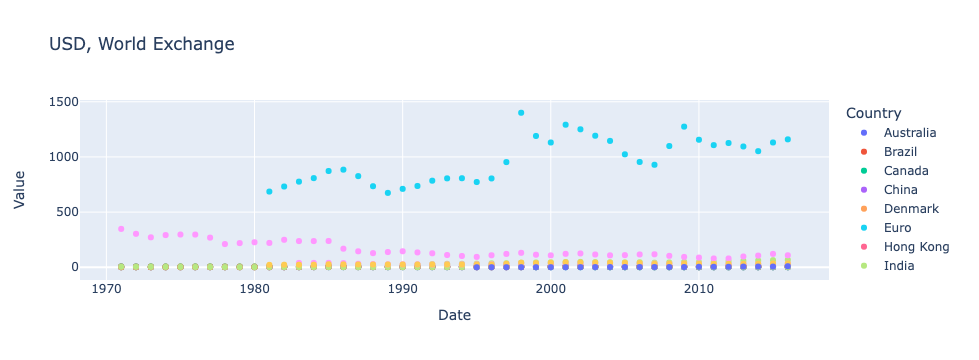

In [80]:
plot 

In [81]:
#create interactive plot
def choose_Countries(Countries):

    
    
    return usd_exchange.loc[usd_exchange['Country']==Countries,:].hvplot.line(
        x="Date",
        y="Value",
        colormap="viridis",
        title="USD Exchange in other countries",
    ).opts(xrotation=90)


Countries_choice = usd_exchange["Country"]

interact(choose_Countries, Countries=Countries_choice)

Column
    [0] Column
        [0] Select(name='Countries', options=['Australia', ...], value='Australia')
    [1] Row
        [0] HoloViews(Curve, name='interactive06928')

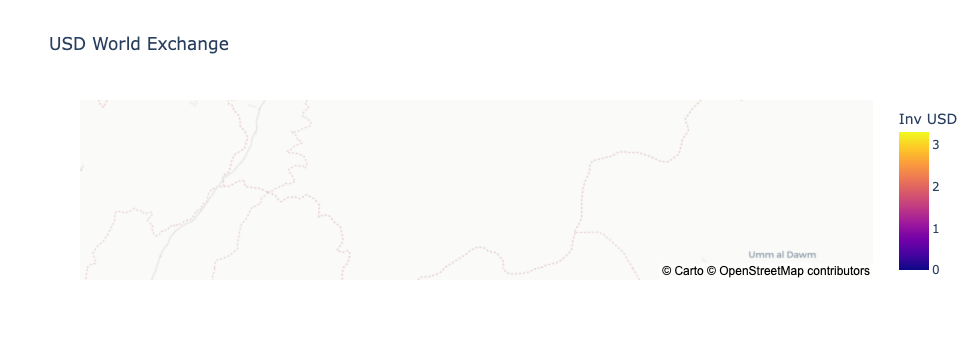

In [91]:
#create mapbox
px.scatter_mapbox(
    current_exchange,
    lat="Lat",
    lon="Lon",
    size="USD",
    color="Inv USD",
    title="USD World Exchange",
    hover_name="Currency",
    mapbox_style="carto-positron"
)

In [98]:
current_exchange.hvplot.line(x="Currency",
                            y="USD",
                            ).opts(xrotation=90)

:Curve   [Currency]   (USD)

UsageError: Line magic function `%save.pdf` not found.
